In [1]:
import os, fnmatch 
#import mesaPlot as mp
import numpy as np
import astropy.units as u
import astropy.constants as c 
import mesa_reader as mr

import matplotlib.pyplot as plt
from ipywidgets import FloatProgress
from IPython.display import display, clear_output

mesa_dir = '' 
work_dir = ''
plot_results_dir = '/Users/janton/Desktop'

def find(pattern,path):
    result = []
    for root,dirs,files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name,pattern):
                result.append(os.path.join(root,name))
    return result

def prepare_canvas():
    plt.rcParams['figure.figsize'] = [15, 10]
    plt.rcParams['axes.linewidth'] = 2.5
    plt.legend(prop={'size': 15})
    
    fontsize = 20
    ax = plt.gca()
    ax.tick_params(direction='in',length=5)
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
        #tick.label1.set_fontweight('bold')
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
        #tick.label1.set_fontweight('bold')

def capture_density(t,rho_0,Q,t_comp,ft):
    rho = rho_0/(1 + (3*c.k_B*t/Q)* np.log(2*np.log(2)*(c.k_B*t/(c.m_e*c.c**2))**5 * (Q/(c.k_B*t))**2 * (t_comp/ft)))
    return rho 
    
def logrhoc_logTc(data,
                  labels,
                  mesa_dir = mesa_dir, 
                  xlim=None,
                  ylim=None,
                  ecap_density_corrections=True,
                  t_comp=1e4*u.yr):
    
    
 #   hydrogen_burning_line = os.path.join(mesa_dir,'data/star_data/plot_info/hydrogen_burn.data')
    helium_burning_line = os.path.join(mesa_dir,'data/star_data/plot_info/helium_burn.data')
    carbon_burning_line = os.path.join(mesa_dir,'data/star_data/plot_info/carbon_burn.data')
    oxygen_burning_line = os.path.join(mesa_dir,'data/star_data/plot_info/oxygen_burn.data')
    electron_degeneracy_line = os.path.join(mesa_dir,'data/star_data/plot_info/psi4.data')
    
    
 #   hburn = np.genfromtxt(hydrogen_burning_line)
    heburn = np.genfromtxt(helium_burning_line)
    cburn = np.genfromtxt(carbon_burning_line)
    oburn = np.genfromtxt(oxygen_burning_line)
    electron = np.genfromtxt(electron_degeneracy_line)

    # Radiation pressure line 
    logrho = np.arange(-9.0,10.0,0.1)
    logt = np.log10(3.2e7) + (logrho - np.log10(0.7))/3.0


    plt.plot(heburn[:,0],heburn[:,1],ls=':',color='black')
    plt.text(5.1, 7.95, 'He burn', fontsize=20,
               rotation=0, rotation_mode='anchor')


    plt.plot(cburn[:,0],cburn[:,1],ls=':',color='black')
    plt.text(5.1, 8.67, 'C burn', fontsize=20,
               rotation=0, rotation_mode='anchor')


    plt.plot(oburn[:,0],oburn[:,1],ls=':',color='black')
    plt.text(5.1, 9.05, 'O burn', fontsize=20,
               rotation=0, rotation_mode='anchor')

    plt.plot(electron[:,0],electron[:,1],ls='--',color='black')

    plt.plot(logrho,logt,ls='--',color='black')

    plt.text(6.98, 9.5, r'$\epsilon_{\rm F}/k T \simeq 4$', fontsize=20, rotation=0, rotation_mode='anchor')
    
    plt.text(5.1, 9.5, r'$P_{\rm rad}\simeq P_{\rm gas}$', fontsize=20, rotation=0, rotation_mode='anchor')
    

    #Weak reaction lines 
    plt.text(9.05, 7.52, r'$^{25}{\rm Mg}\leftrightarrow ^{25}{\rm Na}$', fontsize=15, rotation=90,verticalalignment='bottom')
    plt.text(9.25, 7.52, r'$^{23}{\rm Na} \leftrightarrow ^{23}{\rm Ne}$', fontsize=15, rotation=90,verticalalignment='bottom')
    plt.text(9.65, 7.52, r'$^{24}{\rm Mg}\rightarrow ^{24}{\rm Na}$', fontsize=15, rotation=90,verticalalignment='bottom')
    plt.text(9.75, 7.52, r'$^{24}{\rm Na}\rightarrow ^{24}{\rm Ne}$', fontsize=15, rotation=90,verticalalignment='bottom')
    plt.text(9.85, 7.52, r'$^{25}{\rm Na}\leftrightarrow ^{25}{\rm Ne}$', fontsize=15, rotation=90,verticalalignment='bottom')
    plt.text(10.00, 7.52, r'$^{20}{\rm Ne}\rightarrow ^{20}{\rm F}\rightarrow  ^{20}{\rm O}$', fontsize=15, rotation=90,verticalalignment='bottom')
    
    
    if ecap_density_corrections:
        t = np.arange(7.5,11,0.1)
        t = 10**t * u.K
        rho_ce = capture_density(t,10**9.96,7.025*u.MeV,t_comp,10**9.801*u.s)
        plt.plot(np.log10(rho_ce),np.log10(t.value),color='red',ls='--')
    else:
        plt.axvline(x=9.96,color='red',ls='-')

    plt.text(10.0, 8.3, r'$e^{-}$cSN', fontsize=15, rotation=90,color='red',verticalalignment='bottom')
    
   # now loop over data 
    for i in range(len(data)):
        d = data[i]
        plt.plot(d('log_center_Rho'),d('log_center_T'),label=labels[i])
        
    
    #frame & labels 
    xlabel = r'$\log (\rho_{\rm c} / {\rm gr}\,{\rm cm}^{-3})$'
    ylabel = r'$\log (T_{\rm c} / {\rm K})$'
    plt.xlabel(xlabel,fontsize=22)
    plt.ylabel(ylabel,fontsize=22) 
    
    if xlim:
        plt.xlim(xlim)
    else:
        plt.xlim([5,10.5])
    if ylim:
        plt.ylim(ylim)
    else:
        plt.ylim([7.5,10.0])
        
    
    prepare_canvas()
    plt.savefig(os.path.join(plot_results_dir,'Rhoc_vs_Tc.pdf'))
    plt.show()
    

    
    
def mdot_vs_mass(data,labels):

    for i in range(len(data)):
        d = data[i]
        plt.plot(d('star_mass'),d('log_abs_mdot'),label=labels[i])

    
    xlabel = r'Mass [M$_{\odot}]$'
    ylabel = r'$\dot{M}\,{\rm [ M}_{\odot}\,{\rm yr}^{-1}$]'
    plt.xlabel(xlabel,fontsize=22)
    plt.ylabel(ylabel,fontsize=22) 
    
    prepare_canvas()
    plt.ylim([-12,-2.0])
    plt.savefig(os.path.join(plot_results_dir,'mdot_vs_m.pdf'))
    plt.show()
    
    
def hr(data,labels):
    xlabel = r'log Teff [Kelvin]'
    ylabel = r'log Luminosity'
    plt.xlabel(xlabel,fontsize=22)
    plt.ylabel(ylabel,fontsize=22) 
       
    for i in range(len(data)):
        d = data[i]
        he = d('log_LHe')
        filt = np.where(he>1)
        filt = filt[0][0]
        plt.plot(d('log_Teff')[filt:],d('log_L')[filt:],label=labels[i])
    prepare_canvas()
    plt.xlim([5,3])
    plt.savefig(os.path.join(plot_results_dir,'hr.pdf'))
    plt.show()



def potential_energy(rad,rho):
    udr = c.G*16./3. * np.pi**2. *rho**2 * rad**4 
    return np.trapz(udr,rad).to(u.erg)


def total_energy(Et,mass):
    Et = Et*u.erg/u.gram 
    mass = (mass*u.Msun)
    
    return (Et*mass).sum().to(u.erg)

def nuc_energy(A1,A2,mu1,mu2,X,mtot):
     # A1 -> A2 + energy
    energy_per_reaction = ((A2*mu1 - A1*mu2)*u.mu*c.c**2).to(u.erg)
    reactions_per_gram = (1*u.g / (A2*mu1*u.mu)).to(u.dimensionless_unscaled)/u.g
    mtot = u.Quantity(mtot,u.Msun)
    return (energy_per_reaction*reactions_per_gram *(X*mtot)).to(u.erg)
    


## Data to plot 

In [2]:
import h5py
workdir = '/Users/janton/projects/gw190814/bhns_example'
binary_path = os.path.join(work_dir,'binary_history.hdf5')
primary_path = os.path.join(work_dir,'LOGS1/history.hdf5')
secondary_path = os.path.join(work_dir,'LOGS2/history.hdf5')
!pwd
binary = h5py.File(binary_path,'r')
primary = h5py.File(primary_path,'r+')
secondary = h5py.File(secondary_path,'r+')


/Users/jantoniadis/projects/gw190814/bhns_example


In [3]:
i=0
for n in binary['data_names']:
    print(n,i)
    i=i+1

b'model_number' 0
b'age' 1
b'period_days' 2
b'binary_separation' 3
b'v_orb_1' 4
b'v_orb_2' 5
b'rl_1' 6
b'rl_2' 7
b'rl_relative_overflow_1' 8
b'rl_relative_overflow_2' 9
b'star_1_mass' 10
b'star_2_mass' 11
b'lg_mtransfer_rate' 12
b'lg_mstar_dot_1' 13
b'lg_mstar_dot_2' 14
b'lg_system_mdot_1' 15
b'lg_system_mdot_2' 16
b'lg_wind_mdot_1' 17
b'lg_wind_mdot_2' 18
b'xfer_fraction' 19
b'J_orb' 20
b'Jdot' 21
b'jdot_mb' 22
b'jdot_gr' 23
b'jdot_ml' 24
b'jdot_ls' 25
b'jdot_missing_wind' 26
b'extra_jdot' 27
b'donor_index' 28
b'point_mass_index' 29
b'mdot_limit_low' 30
b'mdot_limit_high' 31
b'ignore_rlof' 32


In [4]:
age = binary['data_vals'][:,1]
period = binary['data_vals'][:,2]
a = binary['data_vals'][:,3]
Teff_1 = primary['data_vals'][:,117]
log_L_1 = primary['data_vals'][:,120]
Teff_2 = secondary['data_vals'][:,117]
log_L_2 = secondary['data_vals'][:,120]

mass_1 = primary['data_vals'][:,2]
mass_2 = secondary['data_vals'][:,2]






## $\log \rho_{\rm c}$ vs $\log T_{\rm c}$

In [5]:
cols= mass_1/mass_1.max()


<ipython-input-15-c5594aa210d4>:26: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(cmap=cm.ocean,norm=colors.Normalize(vmin=20, vmax=60))
<ipython-input-15-c5594aa210d4>:26: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(cmap=cm.ocean,norm=colors.Normalize(vmin=20, vmax=60))
No handles with labels found to put in legend.


23.2807 44.6684


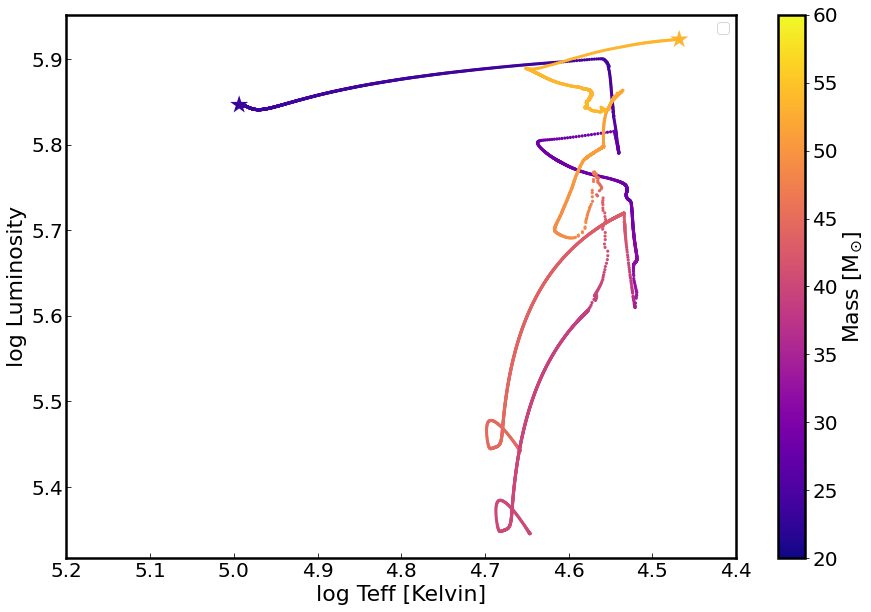

In [15]:

plot_results_dir = '/Users/janton/projects/gw190814/'
from matplotlib import cm
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.colors as colors
    
xlabel = r'log Teff [Kelvin]'
ylabel = r'log Luminosity'
plt.xlabel(xlabel,fontsize=22)
plt.ylabel(ylabel,fontsize=22) 




norm = plt.Normalize(10, 70.)
#lc = LineCollection(segments, cmap='viridis', norm=norm)
norm

plt.scatter(Teff_1,log_L_1,s=10,c=mass_1,edgecolor='none',cmap=cm.plasma,norm=colors.Normalize(vmin=20, vmax=60))
plt.scatter(Teff_2,log_L_2,s=10,c=mass_2,edgecolor='none',cmap=cm.plasma,norm=colors.Normalize(vmin=20, vmax=60))

plt.scatter(Teff_1[-1],log_L_1[-1],s=360,c=mass_1[-1],marker='*',edgecolor='none',cmap=cm.plasma,norm=colors.Normalize(vmin=20, vmax=60))
plt.scatter(Teff_2[-1],log_L_2[-1],s=360,c=mass_2[-1],marker='*',edgecolor='none',cmap=cm.plasma,norm=colors.Normalize(vmin=20, vmax=60))


cbar = plt.colorbar(cmap=cm.ocean,norm=colors.Normalize(vmin=20, vmax=60))
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)
cbar.ax.tick_params(labelsize=20)
cbar.set_label(label=r'Mass [M$_{\odot}$]', size=22)

prepare_canvas()
plt.xlim([5.2,4.4])
print(mass_1.min(),mass_1.max())
plt.savefig('hr.pdf')

## Wind 

<ipython-input-28-8da9eb5fdd9e>:20: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(cmap=cm.ocean,norm=colors.Normalize(vmin=20, vmax=60))
<ipython-input-28-8da9eb5fdd9e>:20: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(cmap=cm.ocean,norm=colors.Normalize(vmin=20, vmax=60))
No handles with labels found to put in legend.


[22.38718688 22.38718688 22.38718688 ... 84.23550044 84.16337688
 84.08578223] d2
23.2807 44.6684


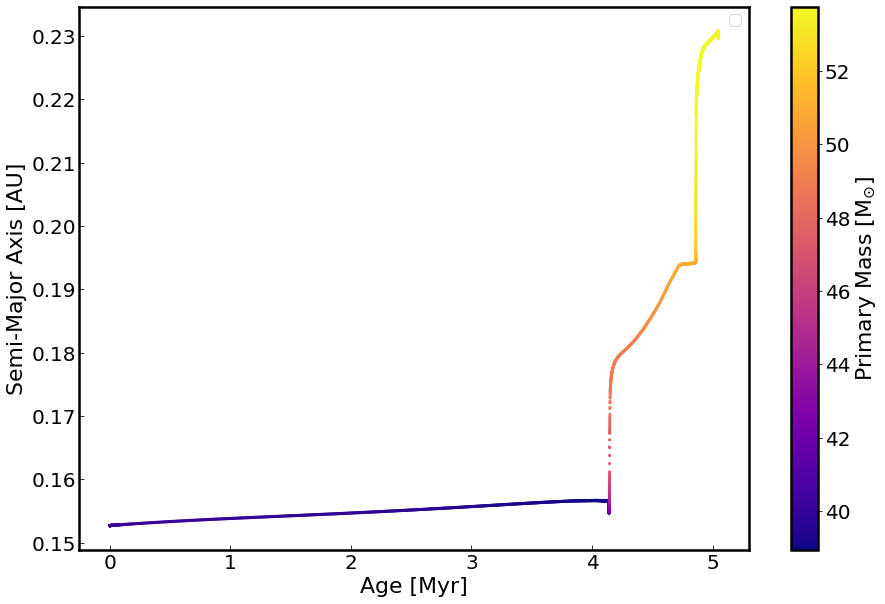

In [28]:
xlabel = r'Age [Myr]'
ylabel = r'Semi-Major Axis [AU]'
plt.xlabel(xlabel,fontsize=22)
plt.ylabel(ylabel,fontsize=22) 




norm = plt.Normalize(10, 70.)
#lc = LineCollection(segments, cmap='viridis', norm=norm)
norm

#a^3/T^2 = GM/4pi^2

print((period*u.day)**2.)
a = (((period*u.day)**2 * c.G*(mass_1+mass_2)*u.Msun/(4*np.pi)**2)**(1./3.)).to(u.AU)

plt.scatter(age/1e6,a,s=10,c=mass_2,edgecolor='none',cmap=cm.plasma)
#plt.scatter(Teff_2,log_L_2,s=10,c=mass_1,edgecolor='none',cmap=cm.plasma,norm=colors.Normalize(vmin=20, vmax=60))
cbar = plt.colorbar(cmap=cm.ocean,norm=colors.Normalize(vmin=20, vmax=60))
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)
cbar.ax.tick_params(labelsize=20)
cbar.set_label(label=r'Primary Mass [M$_{\odot}$]', size=22)

prepare_canvas()
#plt.xlim([5.2,4.4])
print(mass_1.min(),mass_1.max())
plt.savefig('a_major.pdf')

## HR diagram 

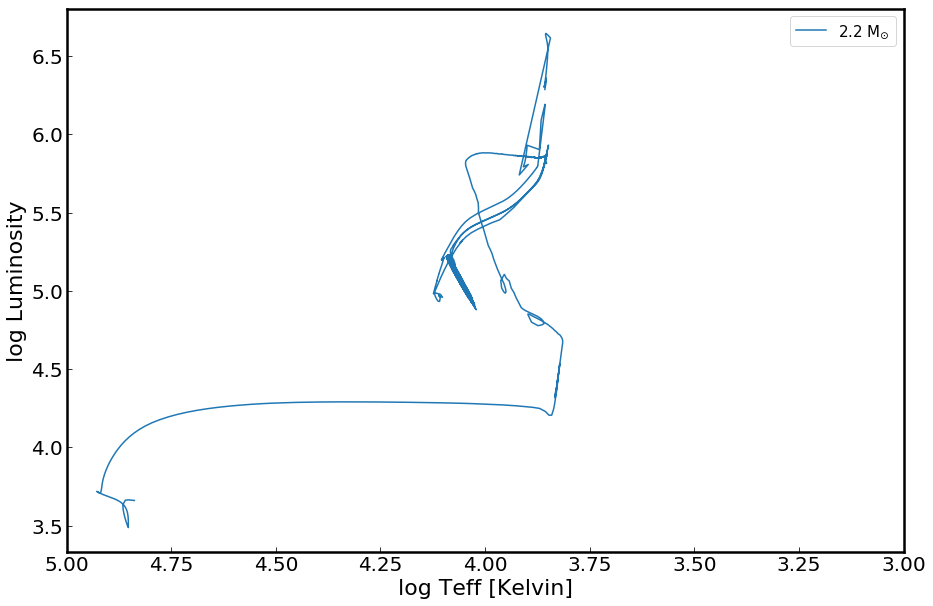

In [80]:
hr(data,labels)

### Energetics

In [118]:
final_profile = mr.MesaData(os.path.join(work_dir,'LOGS/profile4.data')).data
history = mr.MesaData(os.path.join(work_dir,'LOGS/history.data')).data




G = potential_energy(final_profile('radius')*u.Rsun,10**final_profile('logRho')*u.gram/u.cm**3)


print(G)
print( total_energy(final_profile('total_energy'),final_profile('dq')*final_profile('mass')))

#plt.scatter(data2('c_core_mass')[1:],np.diff(data2('c_core_mass'))/(10**(data2('log_dt')[1:])))
#plt.plot(np.log10(data2('star_age')),data2('c_core_mass'))
#plt.xlim([6.45,6.6])
#plt.ylim([0.0,0.00025])

-1.6950543757592715e+51 erg
-8.511369693917913e+50 erg


Thus, in principle $E_{\rm nuc} > E_{\rm bind}$

In [29]:
m=mp.MESA()
p=mp.plot()
m.loadHistory()
m.loadProfile(num=1)


p.plotKip3(m,xaxis='star_age',age_log=True,
           show_mix=True,mix_alpha=0.3,
           show_mass_loc=False,age_units='years',show_mix_labels=False,mod_min=1070, mod_max=2100,
           zone_frac=5,yrng=[0, 1.2])

m.loadProfile(num=16000)
p.plotAbun(m)

NameError: name 'mp' is not defined

No handles with labels found to put in legend.


[22.38718688 22.38718688 22.38718688 ... 84.23550044 84.16337688
 84.08578223] d2
23.2807 23.2807
38.9282 53.5068


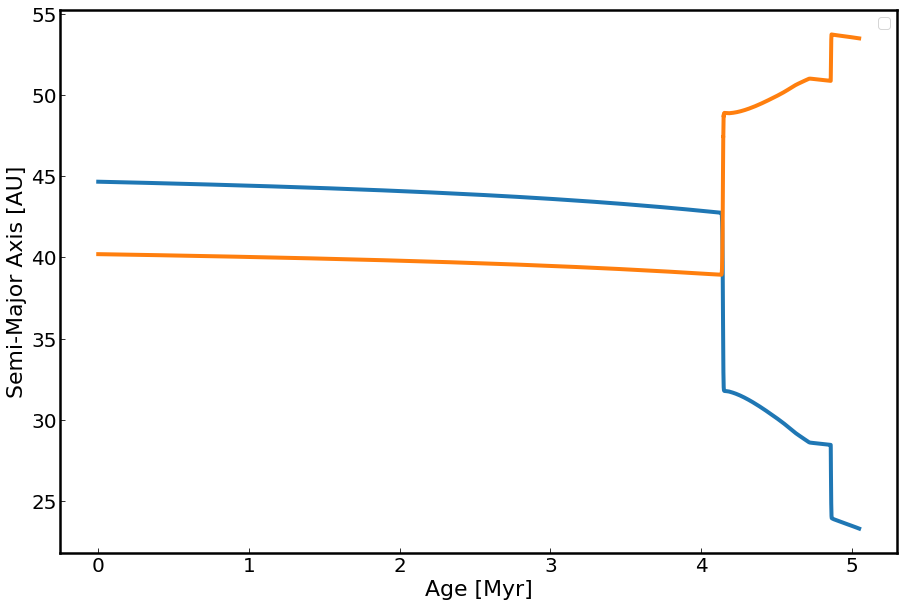

In [37]:
xlabel = r'Age [Myr]'
ylabel = r'Semi-Major Axis [AU]'
plt.xlabel(xlabel,fontsize=22)
plt.ylabel(ylabel,fontsize=22) 




norm = plt.Normalize(10, 70.)
#lc = LineCollection(segments, cmap='viridis', norm=norm)
norm

#a^3/T^2 = GM/4pi^2

print((period*u.day)**2.)
a = (((period*u.day)**2 * c.G*(mass_1+mass_2)*u.Msun/(4*np.pi)**2)**(1./3.)).to(u.AU)


plt.plot(age/1e6,mass_1,lw=4)
plt.plot(age/1e6,mass_2,lw=4)
#plt.scatter(age/1e6,ma,s=10,c=mass_2,edgecolor='none',cmap=cm.plasma)
#plt.scatter(Teff_2,log_L_2,s=10,c=mass_1,edgecolor='none',cmap=cm.plasma,norm=colors.Normalize(vmin=20, vmax=60))
#cbar = plt.colorbar(cmap=cm.ocean,norm=colors.Normalize(vmin=20, vmax=60))
#for t in cbar.ax.get_yticklabels():
#     t.set_fontsize(20)
#cbar.ax.tick_params(labelsize=20)
#cbar.set_label(label=r'Primary Mass [M$_{\odot}$]', size=22)



prepare_canvas()
#plt.xlim([5.2,4.4])
print(mass_1.min(),mass_1[-1])
print(mass_2.min(),mass_2[-1])
plt.savefig('a_major.pdf')